C:\Users\User\AppData\Local\Temp\ipykernel_12640\1692732863.py:10: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_metro['arrival_time'] = pd.to_datetime(df_metro['arrival_time'], dayfirst=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12640\1692732863.py:11: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_senza_metro['arrival_time'] = pd.to_datetime(df_senza_metro['arrival_time'], dayfirst=True)


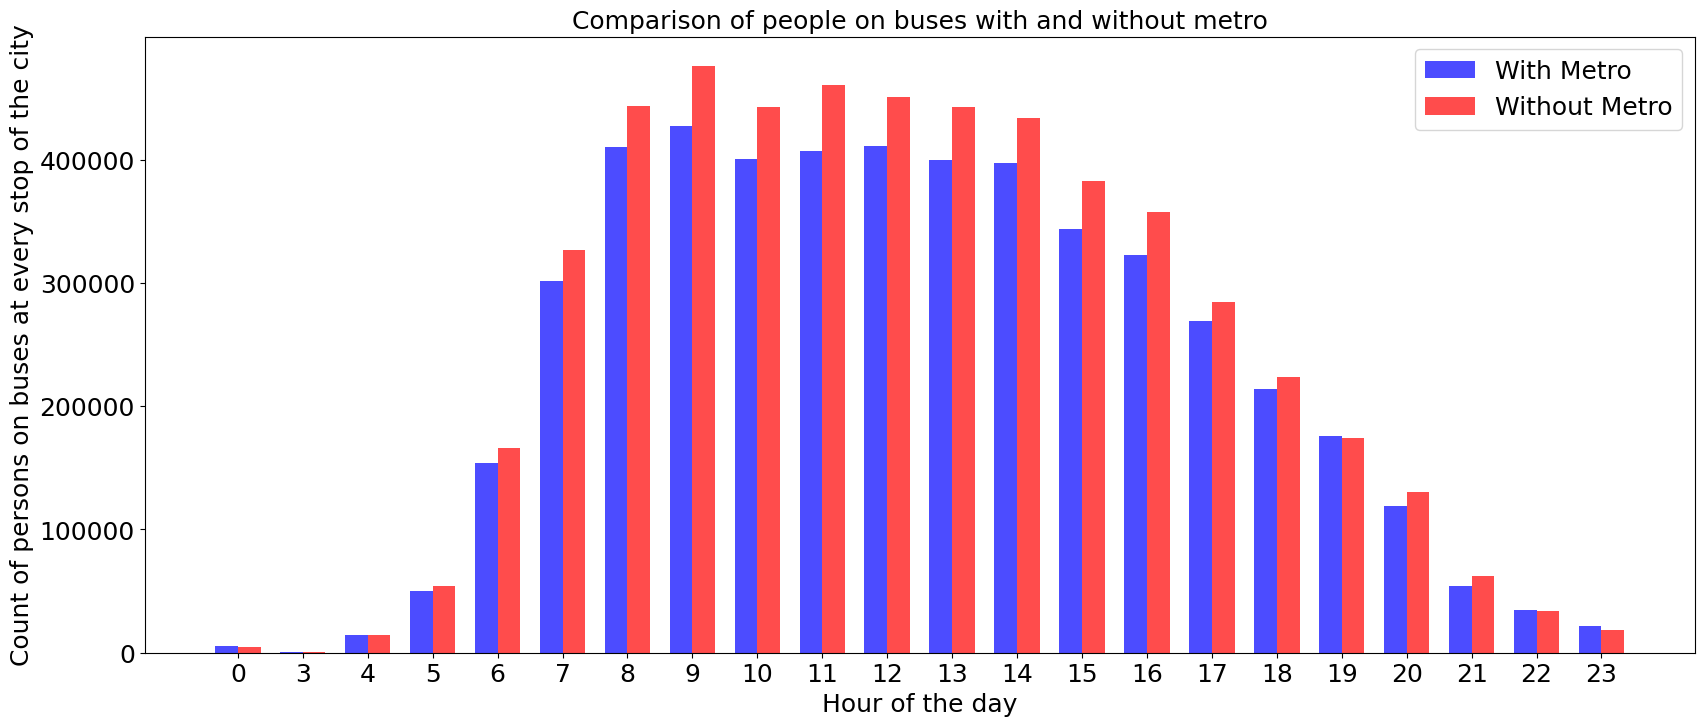

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the datasets
df_metro = pd.read_csv('Dataset_definitivo_25aprile_new.csv', sep=';', dtype='unicode')
df_senza_metro = pd.read_csv('Dataset_definitivo_25aprilenometro_new.csv', sep=';', dtype='unicode')

# Convert the 'arrival_time' column to datetime
df_metro['arrival_time'] = pd.to_datetime(df_metro['arrival_time'], dayfirst=True)
df_senza_metro['arrival_time'] = pd.to_datetime(df_senza_metro['arrival_time'], dayfirst=True)
df_metro['stopinfo_initialPersons'] = df_metro['stopinfo_initialPersons'].astype(int)
df_senza_metro['stopinfo_initialPersons'] = df_senza_metro['stopinfo_initialPersons'].astype(int)

df_metro_bus = df_metro[df_metro['stopinfo_type'].str.contains('bus')]

# Calculate the total count of 'stopinfo_initialPersons' for each hour of the day
count_metro_per_hour = df_metro_bus.groupby(df_metro['arrival_time'].dt.hour)['stopinfo_initialPersons'].sum()
count_senza_metro_per_hour = df_senza_metro.groupby(df_senza_metro['arrival_time'].dt.hour)['stopinfo_initialPersons'].sum()

# Plot the results
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars
x = np.arange(len(count_metro_per_hour))

# Plot the bars for the count of 'stopinfo_initialPersons' for both datasets
plt.bar(x - bar_width/2, count_metro_per_hour, bar_width, color='blue', alpha=0.7, label='With Metro')
plt.bar(x + bar_width/2, count_senza_metro_per_hour, bar_width, color='red', alpha=0.7, label='Without Metro')

plt.title('Comparison of people on buses with and without metro',fontsize=18)
plt.xlabel('Hour of the day',fontsize='18')
plt.ylabel('Count of persons on buses at every stop of the city',fontsize=18)
plt.xticks(x, count_metro_per_hour.index, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
#plt.grid(axis='y')


plt.show()
